In [2]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import numpy as np
import matplotlib
%matplotlib inline
import bs4 as bs # beautifulsoup4
import sklearn
import numpy
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

import fix_yahoo_finance as fyf

import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web
import quandl

from talib import RSI

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 7)
matplotlib.rc('font', family='Verdana') # for Russian

In [109]:
#start_date = dt.datetime(2010, 1, 1)
#end_date = dt.datetime(2018, 12, 31)

#sber = web.DataReader('SBER', 'moex', start_date, end_date)
#sber = sber[sber['BOARDID'] == 'TQBR']

In [435]:
#sber.to_csv('sber_data.csv')

sber = pd.read_csv('sber_data.csv', index_col='TRADEDATE')

In [436]:
sber = sber[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']].dropna()

In [437]:
sber.head()

,OPEN,HIGH,LOW,CLOSE,VOLUME
TRADEDATE,,,,,
2013-05-02,98.75,101.29,98.75,100.84,8247370
2013-05-03,101.64,103.00,100.33,102.92,6583590
2013-05-06,103.29,103.29,102.03,102.28,5184770
2013-05-07,102.14,105.66,101.68,105.14,7598890
2013-05-08,105.37,105.83,104.23,105.81,7983670


In [438]:
sber.CLOSE.values

array([100.84, 102.92, 102.28, ..., 185.  , 186.5 , 186.3 ])

In [439]:
signals = pd.DataFrame(index=sber.index)
signals['long_signal'] = 0.0
signals['short_signal'] = 0.0

In [440]:
signals.head()

,long_signal,short_signal
TRADEDATE,,
2013-05-02,0.0,0.0
2013-05-03,0.0,0.0
2013-05-06,0.0,0.0
2013-05-07,0.0,0.0
2013-05-08,0.0,0.0


In [441]:
rsi = RSI(sber.CLOSE.values, timeperiod=14)
signals['RSI'] = rsi

# Create signals
signals['long_signal'][14:] = np.where(signals['RSI'][14:] > 70, 1.0, 0.0)
signals['short_signal'][14:] = np.where(signals['RSI'][14:] < 30, 1.0, 0.0)

signals = signals.dropna()

In [442]:
# Generate trading orders
signals['long_positions'] = signals['long_signal'].diff()
signals['short_positions'] = signals['short_signal'].diff()
    
    
if signals['long_signal'].iloc[0] == 1:
    signals['long_positions'].iloc[0] = 1
elif signals['long_signal'].iloc[0] == 0:
    signals['long_positions'].iloc[0] = 0
    
if signals['short_signal'].iloc[0] == 1:
    signals['short_positions'].iloc[0] = 1
elif signals['short_signal'].iloc[0] == 0:
    signals['short_positions'].iloc[0] = 0
    
signals

,long_signal,short_signal,RSI,long_positions,short_positions
TRADEDATE,,,,,
2013-05-23,0.0,0.0,59.933361,0.0,0.0
2013-05-24,0.0,0.0,53.587900,0.0,0.0
2013-05-27,0.0,0.0,53.334518,0.0,0.0
2013-05-28,0.0,0.0,55.673720,0.0,0.0
2013-05-29,0.0,0.0,46.622079,0.0,0.0
2013-05-30,0.0,0.0,46.803818,0.0,0.0
2013-05-31,0.0,0.0,44.791914,0.0,0.0
2013-06-03,0.0,0.0,44.372706,0.0,0.0
2013-06-04,0.0,0.0,44.172361,0.0,0.0


In [443]:
# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

positions.head()

""
TRADEDATE
2013-05-23
2013-05-24
2013-05-27
2013-05-28
2013-05-29


In [444]:
sber = sber[14:]

In [445]:
short_cap_gain = -sber['CLOSE'].diff().fillna(0)

short_strategy_gain = short_cap_gain * signals['long_signal'].shift(1).fillna(0)

In [446]:
signals[signals['short_positions'] == 1]

,long_signal,short_signal,RSI,long_positions,short_positions
TRADEDATE,,,,,
2014-01-31,0.0,1.0,28.740147,0.0,1.0
2014-02-27,0.0,1.0,26.748741,0.0,1.0
2014-03-03,0.0,1.0,15.506639,0.0,1.0
2014-04-25,0.0,1.0,29.505446,0.0,1.0
2014-07-21,0.0,1.0,26.598386,0.0,1.0
2014-07-25,0.0,1.0,28.026471,0.0,1.0
2014-12-08,0.0,1.0,24.155214,0.0,1.0
2014-12-12,0.0,1.0,28.486982,0.0,1.0
2016-01-20,0.0,1.0,29.190709,0.0,1.0


In [447]:
signals['short_position_value'] = 'nan'
signals['stock_price'] = sber['CLOSE']
signals['stock_price_diff'] = sber['CLOSE'].diff().fillna(0)

In [451]:
signals['short_position_value'] = signals['stock_price'] * (signals['short_positions'] == 1) + (((signals['short_positions'] == 0) & (signals['short_signal'] == 1) | ((signals['short_positions'] == -1) & (signals['short_signal'] == 0))) * (signals['short_position_value'].shift() - signals['stock_price_diff']) + 0 * ((signals['short_positions'] == 0) * (signals['short_signal'] == 0)) 
signals['short_position_value'] = signals['short_position_value'].fillna(0)
# 1) when enter position
# 2) when in position and when exit
# 3) after exit
signals

SyntaxError: invalid syntax (<ipython-input-451-eef5b82ffec6>, line 2)

In [449]:
signals[signals.short_position_value != 0]

,long_signal,short_signal,RSI,long_positions,short_positions,short_position_value,stock_price,stock_price_diff
TRADEDATE,,,,,,,,
2013-05-23,0.0,0.0,59.933361,0.0,0.0,nan,105.61,0.00
2013-05-24,0.0,0.0,53.587900,0.0,0.0,nan,102.97,-2.64
2013-05-27,0.0,0.0,53.334518,0.0,0.0,nan,102.86,-0.11
2013-05-28,0.0,0.0,55.673720,0.0,0.0,nan,104.00,1.14
2013-05-29,0.0,0.0,46.622079,0.0,0.0,nan,99.90,-4.10
2013-05-30,0.0,0.0,46.803818,0.0,0.0,nan,99.98,0.08
2013-05-31,0.0,0.0,44.791914,0.0,0.0,nan,99.00,-0.98
2013-06-03,0.0,0.0,44.372706,0.0,0.0,nan,98.80,-0.20
2013-06-04,0.0,0.0,44.172361,0.0,0.0,nan,98.71,-0.09


In [409]:
#short_price = (sber.ix[0]['CLOSE'] + sber.CLOSE.diff(-1).shift(1).fillna(0).cumsum())
# calculate value of short position in stock using the first price and cumulative sum of short value differences
# this works only for short starting at the beginning!

In [410]:
n_shares = 10

# Buy n shares
positions['long_STOCK'] = n_shares*signals['long_signal']  
positions['short_STOCK'] = n_shares*signals['short_signal']

# Initialize the portfolio with value owned 
portfolio = pd.DataFrame(index=positions.index)
portfolio['long_STOCK'] = positions['long_STOCK'] * sber['CLOSE']
portfolio['short_STOCK'] = positions['short_STOCK'] * signals['short_position_value']

In [411]:
# Store the difference in shares owned 
pos_diff = positions.diff()
if signals['long_signal'].iloc[0] == 1:
    pos_diff['long_STOCK'].iloc[0] = n_shares
elif signals['long_signal'].iloc[0] == 0:
    pos_diff['long_STOCK'].iloc[0] = 0

if signals['short_signal'].iloc[0] == 1:
    pos_diff['short_STOCK'].iloc[0] = n_shares
elif signals['short_signal'].iloc[0] == 0:
    pos_diff['short_STOCK'].iloc[0] = 0

In [412]:
# Add `holdings` to portfolio
portfolio['holdings'] = portfolio['long_STOCK'] + portfolio['short_STOCK']

In [420]:
initial_capital = 10000.0

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(sber['CLOSE'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['return'] = portfolio['total'].pct_change()

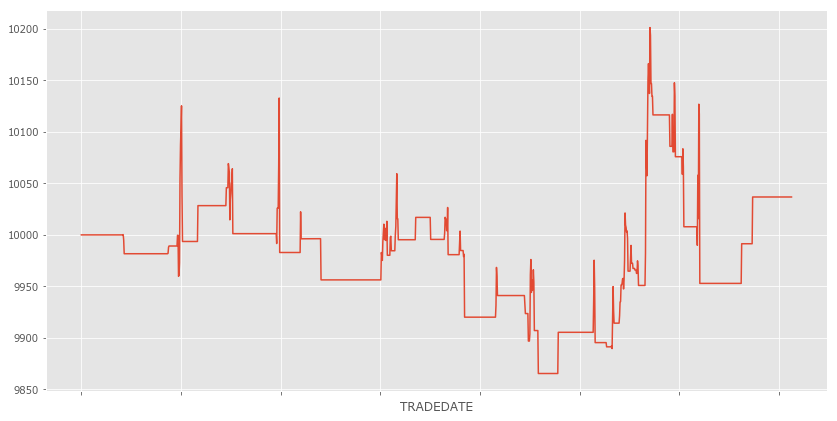

In [428]:
portfolio.total.plot()

In [423]:
portfolio.to_csv('portfolio.csv')

### FIXED VALUE OF POSITION

In [434]:
my_cap = 10000

signals['sharesowned'] = my_cap * ((signals.long_positions == 1) | (signals.short_positions == 1)) \
/ signals['stock_price'] \
+ signals['shares owned'].shift() * (((signals['long_positions'] == 0) & (signals['long_signal'] == 1))\
                                     | ((signals['long_positions'] == -1) & \
(signals['long_signal'] == 0)) | ((signals['short_positions'] == 0) & (signals['short_signal'] == 1)) | \
                                    ((signals['short_positions'] == -1) & (signals['short_signal'] == 0))) + 0


# Initialize the portfolio with value owned 
portfolio = pd.DataFrame(index=positions.index)

portfolio['long_STOCK'] = my_cap * (signals.long_positions == 1) + \
(((signals['long_positions'] == 0) & (signals['long_signal'] == 1)) | ((signals['long_positions'] == -1) & \
(signals['long_signal'] == 0))) * (signals['stock_price'].shift() - signals['stock_price_diff']) \
* signals['shares_owned'] + \
+ 0 * ((signals['long_positions'] == 0) * (signals['long_signal'] == 0)) 
portfolio['long_STOCK'] = portfolio['long_STOCK'].fillna(0)

portfolio['short_STOCK'] = my_cap * (signals.short_positions == 1) + \
(((signals['short_positions'] == 0) & (signals['short_signal'] == 1)) | ((signals['short_positions'] == -1) & \
(signals['short_signal'] == 0))) * (signals['short_STOCK'].shift() - signals['stock_price_diff']) \
* signals['shares_owned'] + \
+ 0 * ((signals['short_positions'] == 0) * (signals['long_signal'] == 0)) 
portfolio['long_STOCK'] = portfolio['long_STOCK'].fillna(0)

KeyError: 'shares_owned'